<h1>ACML COMS4030A Assignment 1: <br>
    Linear Regression Model</h1>

The first homework for ACML Hons 2021


## Problem 1
The hypothesis eqaution to approximmate $y$ as a linear regression function is defined as follows:
$$h_\theta(x) = \sum_{i = 0}^{n}\theta_{i}x_{i}$$

Here, the $\theta's$ are the parameters (also called weights) parametizing the space of linear functions mapping from $\mathbf{X} \rightarrow \mathbf{Y}$.
$x_0 = 1$
The $x's$ are the training features.

We define a function that measures, for each values of $\theta's$, how close are $h(\theta)^{i}$'s are to the corresponding actual values, $y^{i}$'s.

We define the cost function as follows:

$$J_\theta(x) = \frac{1}{2m}\sum_{i = 0}^{n}(h_\theta(x^{i})-y^{i})^2 $$

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
np.random.seed(10)


### Reading data  .........house price prediction data from kaggle https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [219]:
df_data = pd.read_csv('real_estate.csv')

### Data Visualization

In [220]:
df_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [221]:
#DROPPING THE No columns
df_data.drop(columns = ['No'],inplace = True)


### Checking data types

In [222]:
#Checking the data types
df_data.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### Checking null values

In [223]:
#Checking for null values
df_data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### using describe  we can get statistical view of our dataset like mean, median, standard deviation etc

In [224]:
#Doing the summary statistics
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [225]:
#Checking a sample of the data
df_data[:].head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Correlation-  measure of how things are related,it can help define trends,make prediction

In [226]:
#Finding correlation amongst the features
df_data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


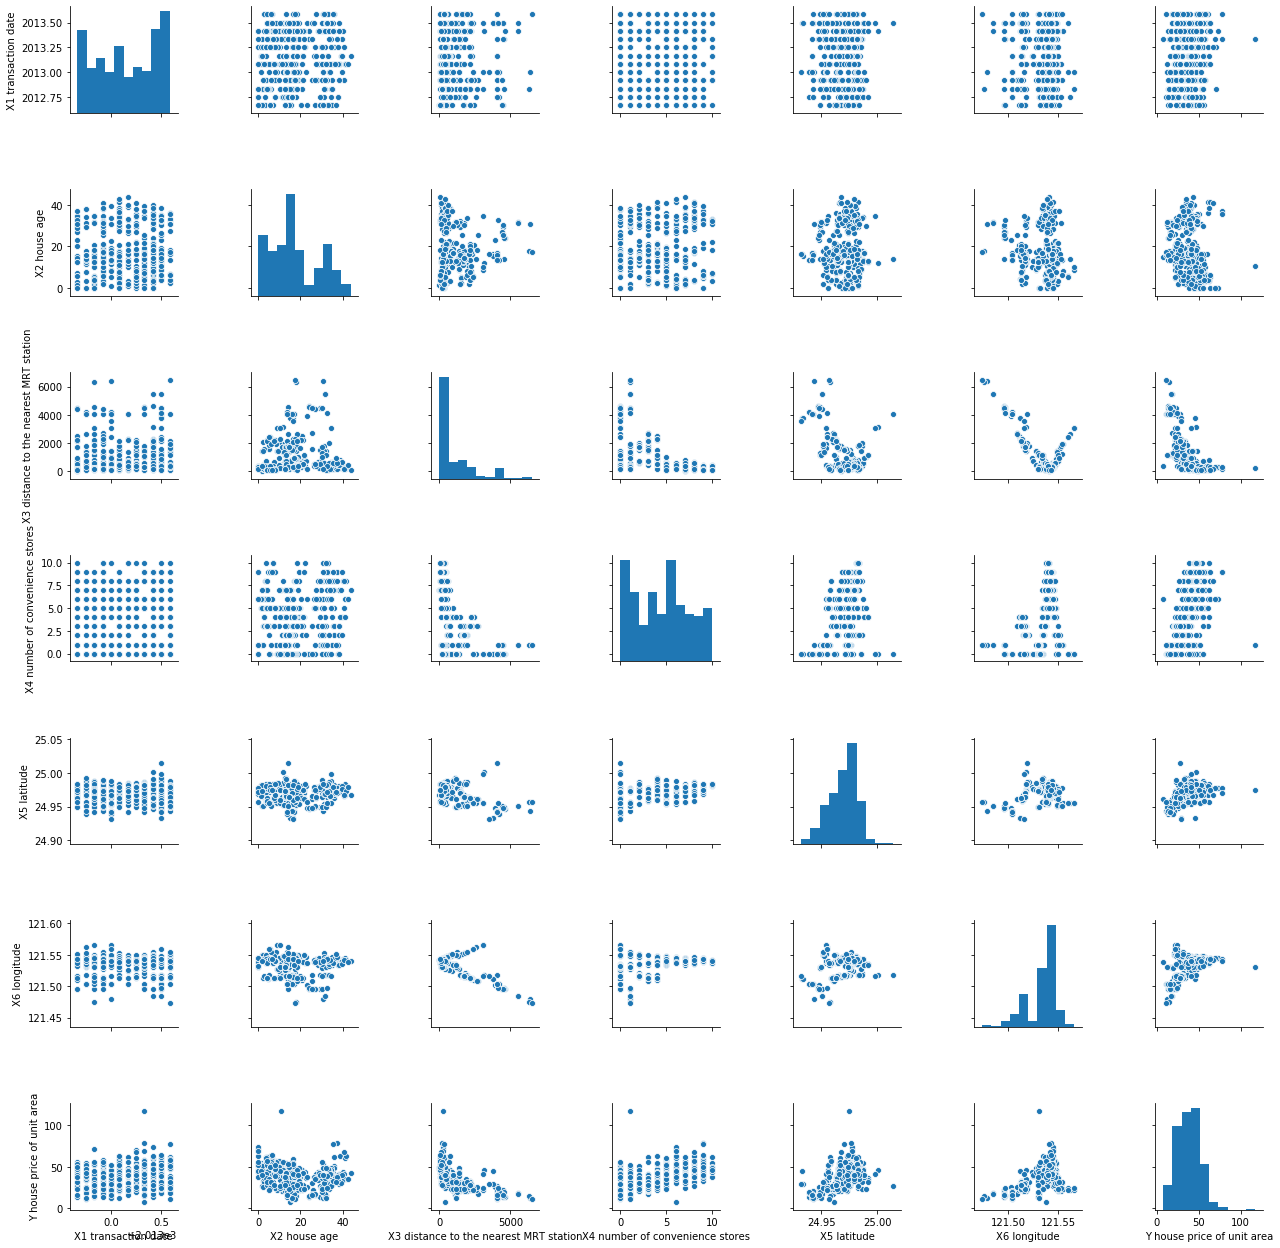

In [227]:
#Pairplot for all the features
sns.pairplot(df_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228E485D048>,
      dtype=object)

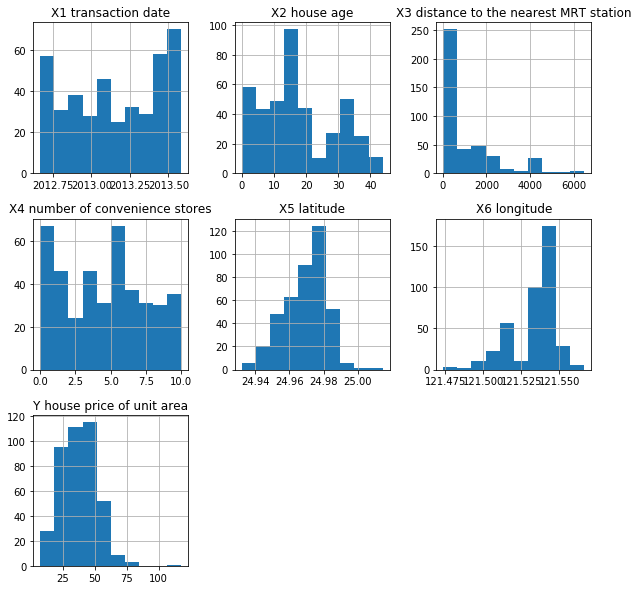

In [228]:
df_data.hist(figsize=(10,10))

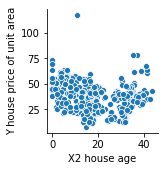

In [229]:
#House age vs unit price
sns.pairplot(df_data,x_vars="X2 house age",y_vars="Y house price of unit area")

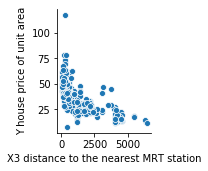

In [230]:
sns.pairplot(df_data,x_vars="X3 distance to the nearest MRT station",y_vars="Y house price of unit area")

### Correlation heatmap

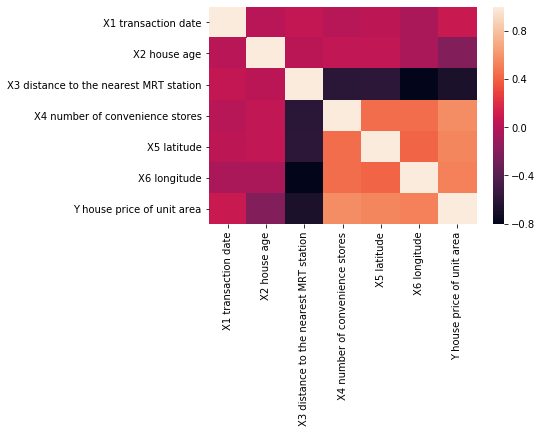

In [231]:
#Correlation heatmap
sns.heatmap(df_data[:].corr())

In [232]:
#Checking the training values without the target variable
df_data.values[:,:-1]

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

### shape of the data

In [233]:
#Checking the shape of the data
m,n = df_data.shape

In [234]:
m,n

(414, 7)

### Bias term addition --- Adding the Bias term to our dataset for model training

In [235]:
df_data.insert(0,"bias",1)

In [236]:
df_data

,bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,1,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,1,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,1,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,1,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,1,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,1,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,1,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,1,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


### Splitting dataset into training and testing

In [237]:
#Splitting dataset into training and testing using a boelean msk
def split_data(df):
    """
    Takes dataframe and splits it into two sets of train and test
    
    Returns:
    Train
    Test
    """
    msk = np.random.rand(len(df)) < 0.9
    train = df[msk]##true for training
    test = df[~msk]##false for testing
    
    return train,test

In [238]:
train,test = split_data(df_data)

In [239]:
train

,bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,1,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,1,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,1,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,1,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,1,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,1,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,1,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,1,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [195]:
##Training columns that need to be normalized
train.columns[1:-1]

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

### Feature Scaling

### Min-max Normalization 
is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0,minimum  value will be 0 and maximum value will be 1,every other values gets transformed to decimal between 0 and 1

In [196]:
def feature_min_max(df):
    """
    Normalize the input features (X1-X6)
    
    Apply the min-max scaling in Pandas using the .min() and .max() methods: column\feature based
    
    Return:
    ---------
    normalized training data
    """
  
    df_norm = df.copy()
    # apply min-max scaling to the training features
    for column in df_norm.columns[1:-1]:
        ##check to avoid dividing by zero
        if df_norm[column].min() == df_norm[column].max():
            df_norm[column] = df_norm[column]/df_norm[column].max()
        else:    
            df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [197]:
#Testing the feature min_max function
feature_min_max(train)

,bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,1,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,1,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,1,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,43.1
5,1,0.000000,0.162100,0.332833,0.3,0.375424,0.420638,32.1
6,1,0.000000,0.787671,0.092827,0.7,0.572710,0.678132,40.3
7,1,0.818777,0.463470,0.040872,0.6,0.585919,0.741320,46.7
8,1,0.909389,0.723744,0.849027,0.1,0.228793,0.119150,18.8
9,1,0.818777,0.408676,0.272219,0.3,0.427048,0.445655,22.1


### Feature standardization

### zscore_standardization -Rescales features to have zero mean and unit variance


In [198]:
def zscore_standardization(df):
    """
    Normalize the input features
    Apply the z-score method in Pandas using the .mean() and .std(): column\feature based.
    """
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns[1:-1]:
        #check to avoid dividing by zero
        if df_std[column].min() == df_std[column].max():
            df_std[column] = df_std[column]/df_std[column].max()
        else:
            df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [199]:
##Testing the zscore_standardization function
zscore_standardization(train)

,bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,-0.824263,1.252466,-0.789970,2.010140,1.118518,0.453849,37.9
1,1,-0.824263,0.147356,-0.618635,1.670261,0.909095,0.407126,42.2
2,1,1.538237,-0.400779,-0.421278,0.310746,1.473902,0.688742,47.3
3,1,1.243811,-0.400779,-0.421278,0.310746,1.473902,0.688742,54.8
4,1,-1.122236,-1.134572,-0.553743,0.310746,0.832148,0.595297,43.1
5,1,-1.711087,-0.948914,0.825230,-0.369011,-0.462465,-1.319052,32.1
6,1,-1.711087,1.473488,-0.373762,0.990504,0.828975,0.209355,40.3
7,1,0.949386,0.218083,-0.633312,0.650625,0.915441,0.584417,46.7
8,1,1.243811,1.225943,3.403961,-1.048768,-1.422319,-3.108594,18.8
9,1,0.949386,0.005902,0.522422,-0.369011,-0.124533,-1.170564,22.1


In [200]:
train

,bias,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,1,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,1,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,1,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,1,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,1,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,1,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,1,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,1,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


### Hypothesis function

In [201]:
def hypothesis_func(X,Theta):
    """
    Compute the hypothesis function using the inputs: X's training features and 
    Theta's learnable parameters
    Return: hypothesis
    
    Parameters:(m,k)*(k,1) = (m,1)
    -----------
    X (Training features) (m,k)
    Thetas (1,k)
    """
    
    return np.dot(X,Theta.T)

### Cost Function

In [202]:
def cost_function(X,Y,Theta):
    
    """
    Computes the MSE of a prediction based on Theta, over the whole X.
    
    X: (m,k) each row is an input with k features (including the bias term, 1's)
    Y: (m,1) observed output per input
    Theta: theta(k,1) trainable regression parameters
    """
    m,_ = X.shape
    cost = (1/2.0*m)*((np.square(hypothesis_func(X,Theta)-Y)).sum(axis=0))
    
    return cost

### R-Squared also known as Coefficient of Determination

In [203]:
def compute_rsquared(X, Y, Theta):
    """
    Compute R^2 - the coefficeint of determination for theta.
    X: (m, k) input.
    y: (m, 1) observed output per input.
    theta: (k, 1) regression parameters.
    Returns the R2 - a scalar.
    """
    yhat = np.dot(X, Theta.T)
    diff = yhat - Y
    SE_line = np.dot(diff.T, diff)
    SE_y = len(Y) * Y.var()
    return (1 - SE_line / SE_y).flat[0]

In [204]:
def sample_predictions_vs_truth(X, y, theta, nsamples=10):
    """
    Display a sample of predictions vs. actual values.
    X: (m, k) input.
    y: (m, 1) observed output per input.
    theta: (k, 1) regression parameters.
    
    """
    print('Sample of Predictions vs. Actual Values')
    yhat = np.dot(X, theta.T)
    sample_indices = np.random.choice(X.shape[0], size=nsamples, replace=False)
    for index in sample_indices:
        print('Sample #{0}: yhat={1}, y={2}'.format(index,
                                                      yhat[index][0],
                                                      y[index][0]))

<h3> Least Mean Square (LMS) Algorithm:</h3>

We want to choose $\theta$ as to minimize the $J(\theta)$. We consider the gradient descent function which starts with some initial values and updates them with each iteration of the following algorithm:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)$$
Here, $\alpha$ is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of $J$.

In [205]:
def GradientDescent(X,Y,theta, iterations, alpha):
    
    """
    Runs the gradient descent algorithm to fit the line y = theta.dot(x)
    
    
    X: x(k,n) each row is an input with n features (inc 1's)
    Y: y(k,1) observed output per input
    Theta: theta(n,1) trainable regression parameters
    Alpha: the learning rate, step size to take. 
    Iterations: Number of iterations the loop must run
    
    
    """
    count = 1
    cost_log = np.array([])
    
    while(count <= iterations):
        hypothesis = hypothesis_func(X,Theta)
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,2:3])).sum(axis=0)
        temp3 = Theta[0,3] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,3:4])).sum(axis=0)
        temp4 = Theta[0,4] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,4:5])).sum(axis=0)
        temp5 = Theta[0,5] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,5:6])).sum(axis=0)
        temp6 = Theta[0,6] - alpha*(1.0/m)*((hypothesis-Y)*(X[::,-1:])).sum(axis=0)
        
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        Theta[0,3] = temp3
        Theta[0,4] = temp4
        Theta[0,5] = temp5
        Theta[0,6] = temp6
        
        cost_log = np.append(cost_log,cost_function(X,Y,Theta))
        count +=1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()    
    return Theta

<h4>Initializations of Parameters and testing normal regression</h4>

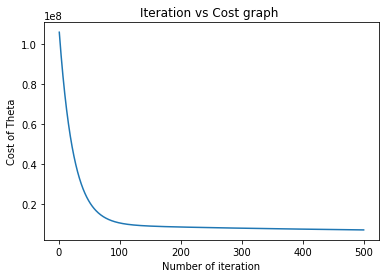

[[15.8264385   7.07312378  2.35634056 -1.91235695 11.59166412 10.00976985
  13.0087762 ]]


In [206]:
np.random.seed(42)
Theta = np.random.rand(1,7)
alpha = 0.01
iterations = 500
Theta = GradientDescent(feature_min_max(train).values[:,:-1],train.values[:,-1:],Theta,iterations,alpha)
print(Theta)

In [207]:
print('Training set R^2:', compute_rsquared(feature_min_max(train).values[:,:-1], train.values[:,-1:], Theta))
print('Testing set R^2:', compute_rsquared(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta))

Training set R^2: 0.432252767555088
Testing set R^2: 0.20402650922113974


Exploring different learning rates, $\alpha$

In [208]:
# To assess how good the fit is, print out a random sample of predictions
# for the test set compared to the real y values for these inputs.
sample_predictions_vs_truth(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta)
    

Sample of Predictions vs. Actual Values
Sample #17: yhat=36.279795485390395, y=117.5
Sample #13: yhat=35.750929982941095, y=22.3
Sample #4: yhat=50.340863580155755, y=41.9
Sample #10: yhat=35.60256850003485, y=42.5
Sample #14: yhat=48.46302597427829, y=63.3
Sample #25: yhat=28.78300482138047, y=31.3
Sample #6: yhat=25.273546606142755, y=16.1
Sample #26: yhat=49.749614913502164, y=44.9
Sample #24: yhat=37.93874126112515, y=47.0
Sample #16: yhat=41.268612337733266, y=41.1


### testing with a zscore and a different learning rate

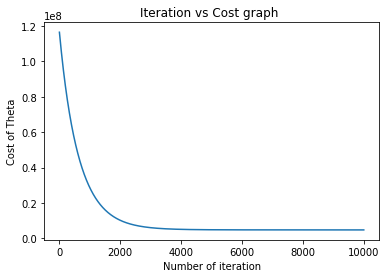

[[37.684102    1.29625918 -2.91071985 -4.20552558  3.68697867  3.0383748
   0.91245431]]


In [209]:
##Testing with zscore and a different learning rate
np.random.seed(42)
Theta = np.random.rand(1,7)
alpha = 0.0008
iterations = 10000
Theta = GradientDescent(zscore_standardization(train).values[:,:-1],train.values[:,-1:],Theta,iterations,alpha)
print(Theta)

In [210]:
print('Training set R^2:', compute_rsquared(feature_min_max(train).values[:,:-1], train.values[:,-1:], Theta))
print('Testing set R^2:', compute_rsquared(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta))

Training set R^2: 0.21080207126649864
Testing set R^2: 0.16771906868128028


In [211]:
# To assess how good the fit is, print out a random sample of predictions
# for the test set compared to the real y values for these inputs.
sample_predictions_vs_truth(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta)
    

Sample of Predictions vs. Actual Values
Sample #17: yhat=40.46108960464776, y=117.5
Sample #13: yhat=36.93515209522191, y=22.3
Sample #4: yhat=41.5497566848949, y=41.9
Sample #10: yhat=39.8182547706758, y=42.5
Sample #14: yhat=43.966234685202856, y=63.3
Sample #25: yhat=36.80506965972771, y=31.3
Sample #6: yhat=33.907886842539895, y=16.1
Sample #26: yhat=44.36895311821493, y=44.9
Sample #24: yhat=41.34156306947808, y=47.0
Sample #16: yhat=39.19588561894217, y=41.1


###  Regularization

### Cost Function  with Regularization

In [212]:
def regularizedcost(X,Y,theta,lamda):
    m,_= X.shape
    cost = (1/(2.0*m))*((np.square(hypothesis_func(X,Theta)-Y)).sum(axis=0))
    #No regularisation on theta_0
    costlamda = (lamda/(2.0*m))*np.sum(np.square(theta[:,1:]))
    regcost = cost + costlamda
    return regcost

### Gradient Descent with Regularization

In [213]:
def RegGradientDescent(X,Y,theta, iterations, alpha,lamda):
    
    """
    Runs the gradient descent algorithm to fit the line y = theta.dot(x)
    
    
    X: x(k,n) each row is an input with n features (inc 1's)
    Y: y(k,1) observed output per input
    Theta: theta(n,1) trainable regression parameters
    Alpha: the learning rate, step size to take. 
    Iterations: Number of iterations the loop must run
    
    
    """
    count = 1
    cost_log = np.array([])
    
    while(count <= iterations):
        hypothesis = hypothesis_func(X,Theta)
        temp0 = Theta[0,0] - alpha*(1.0/(m))*((hypothesis-Y)*(X[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,1:2])).sum(axis=0)+((lamda)/(m))* Theta[0,1])
        temp2 = Theta[0,2] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,2:3])).sum(axis=0)+((lamda)/(m))* Theta[0,2])
        temp3 = Theta[0,3] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,3:4])).sum(axis=0)+((lamda)/(m))* Theta[0,3])
        temp4 = Theta[0,4] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,4:5])).sum(axis=0)+((lamda)/(m))* Theta[0,4])
        temp5 = Theta[0,5] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,5:6])).sum(axis=0)+((lamda)/(m))* Theta[0,5])
        temp6 = Theta[0,6] - alpha*((1.0/(m))*((hypothesis-Y)*(X[::,-1:])).sum(axis=0)+((lamda)/(m))* Theta[0,6])
        
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        Theta[0,3] = temp3
        Theta[0,4] = temp4
        Theta[0,5] = temp5
        Theta[0,6] = temp6
        
        cost_log = np.append(cost_log,regularizedcost(X,Y,Theta,lamda))
        count +=1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()    
    return Theta

<h4>Initializations of Parameters and testing L2 regression</h4>

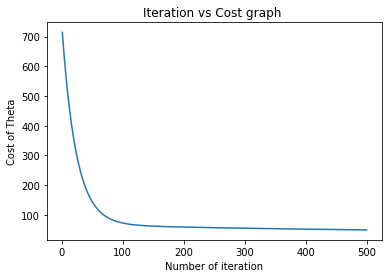

The learned parameters [[15.91450588  7.03889699  2.34667008 -1.90897874 11.5362417   9.95810059
  12.94214165]]


In [214]:
np.random.seed(42)
Theta = np.random.rand(1,7)
alpha = 0.01
iterations = 500
lamda = 1
Theta = RegGradientDescent(feature_min_max(train).values[:,:-1],train.values[:,-1:],Theta,iterations,alpha,lamda)
print("The learned parameters", Theta)



In [215]:
print('Training set R^2:', compute_rsquared(feature_min_max(train).values[:,:-1], train.values[:,-1:], Theta))
print('Testing set R^2:', compute_rsquared(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta))

Training set R^2: 0.43136801624311816
Testing set R^2: 0.2034998033852401


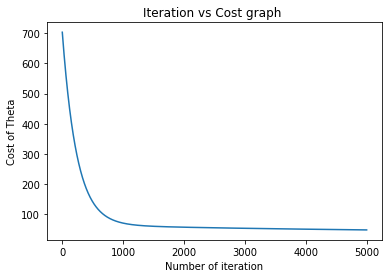

[[15.95176518  6.74678244  2.26435783 -2.30564829 11.91054767 10.36987231
  12.77960872]]


In [216]:
Theta = np.random.rand(1,7)
alpha = 0.00099
iterations = 5000
lamda = 1e-7
Theta = RegGradientDescent(feature_min_max(train).values[:,:-1],train.values[:,-1:],Theta,iterations,alpha,lamda)
print(Theta)

In [153]:
print('Training set R^2:', compute_rsquared(feature_min_max(train).values[:,:-1], train.values[:,-1:], Theta))
print('Testing set R^2:', compute_rsquared(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta))

Training set R^2: 0.43136801624311816
Testing set R^2: 0.2034998033852401


In [154]:
# To assess how good the fit is, print out a random sample of predictions
# for the test set compared to the real y values for these inputs.
sample_predictions_vs_truth(feature_min_max(test).values[:,:-1], test.values[:,-1:], Theta)
    

Sample of Predictions vs. Actual Values
Sample #17: yhat=36.265046023838536, y=117.5
Sample #13: yhat=35.73592417862057, y=22.3
Sample #4: yhat=50.25846119790874, y=41.9
Sample #10: yhat=35.59092805678128, y=42.5
Sample #14: yhat=48.38742915364841, y=63.3
Sample #25: yhat=28.80172306989211, y=31.3
Sample #6: yhat=25.312549911197774, y=16.1
Sample #26: yhat=49.668696263682946, y=44.9
Sample #24: yhat=37.916203004353605, y=47.0
Sample #16: yhat=41.22966085432191, y=41.1
